In [1]:
import torch
import numpy as np
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "experiment_stats_rnn100.npy"
rnn_stats = np.load(file)

#transforms list of dicts to a dict of lists
rnn_dict = {k: [dic[k] for dic in rnn_stats] for k in rnn_stats[0]}

In [4]:
file = "experiment_stats_lstm100.npy"
lstm_stats = np.load(file)

#transforms list of dicts to a dict of lists
lstm_dict = {k: [dic[k] for dic in lstm_stats] for k in lstm_stats[0]}

In [5]:
#converts the two dicts into one convinient dataframe with only the 
#relevant information

df_stats = pd.DataFrame.from_dict(data = rnn_dict)


df_stats.drop(labels = ['last acc', 'num steps', 'accs', 
                        'model_type', 'input_dim', 'num_classes', 
                        'num_hidden', 'batch_size', 'learning_rate',
                        'train_steps', 'max_norm', 'device', 
                        'experiment', 'print_every'],
              axis = 'columns',
              inplace = True)

df_stats.rename(index = str,
                columns = {"best acc": "rnn acc", 
                           "step best acc": "rnn steps"},
                inplace = True)

df_stats["lstm acc"] = lstm_dict["best acc"]
df_stats["lstm steps"] = lstm_dict["step best acc"]
df_stats

,rnn acc,rnn steps,input_length,lstm acc,lstm steps
0,1.0000,869,5,1.0000,1514
1,0.6250,2353,25,0.5000,9304
2,0.4375,320,45,0.5000,189
3,0.6250,9596,65,0.4375,277
4,0.5625,1662,85,0.5625,2213


In [6]:
df_stats.describe()

,rnn acc,rnn steps,input_length,lstm acc,lstm steps
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.650000,2960.000000,45.000000,0.600000,2699.400000
std,0.210097,3789.182959,31.622777,0.227932,3789.215922
min,0.437500,320.000000,5.000000,0.437500,189.000000
25%,0.562500,869.000000,25.000000,0.500000,277.000000
50%,0.625000,1662.000000,45.000000,0.500000,1514.000000
75%,0.625000,2353.000000,65.000000,0.562500,2213.000000
max,1.000000,9596.000000,85.000000,1.000000,9304.000000


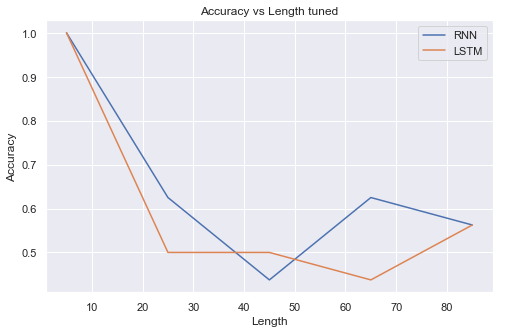

In [7]:
title = "Accuracy vs Length tuned"
ylabel = "Accuracy"
xlabel = "Length"

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["rnn acc"], 
                  label = "RNN")
ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["lstm acc"],
                  label = "LSTM")
ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")

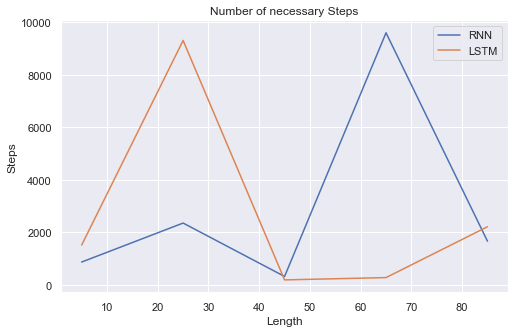

In [8]:
title = "Number of necessary Steps"
ylabel = "Steps"
xlabel = "Length"

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["rnn steps"], 
                  label = "RNN")
ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["lstm steps"],
                  label = "LSTM")
ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")

In [9]:
df_stats["rnn scaled"] = df_stats["rnn acc"]*df_stats["rnn steps"]
df_stats["lstm scaled"] = df_stats["lstm acc"]*df_stats["lstm steps"]
df_stats.head()

,rnn acc,rnn steps,input_length,lstm acc,lstm steps,rnn scaled,lstm scaled
0,1.0000,869,5,1.0000,1514,869.000,1514.0000
1,0.6250,2353,25,0.5000,9304,1470.625,4652.0000
2,0.4375,320,45,0.5000,189,140.000,94.5000
3,0.6250,9596,65,0.4375,277,5997.500,121.1875
4,0.5625,1662,85,0.5625,2213,934.875,1244.8125


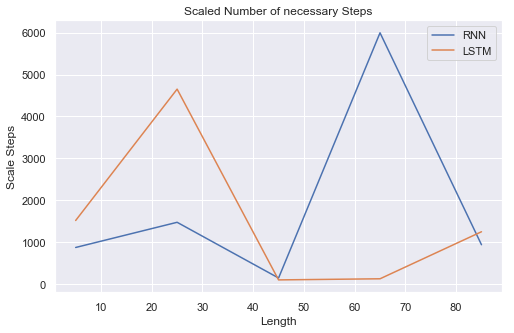

In [10]:


title = "Scaled Number of necessary Steps"
ylabel = "Scale Steps"
xlabel = "Length"

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["rnn scaled"], 
                  label = "RNN")
ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["lstm scaled"],
                  label = "LSTM")
ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")

In [23]:
file = "experiment_stats_500rrn500.npy"
rrn_stats = np.load(file)

#transforms list of dicts to a dict of lists
rrn_dict = {k: [dic[k] for dic in rrn_stats] for k in rrn_stats[0]}

In [26]:
df_stats = pd.DataFrame.from_dict(data = rrn_dict)


df_stats.drop(labels = ['last acc', 'num steps', 'accs', 
                        'model_type', 'input_dim', 'num_classes', 
                        'num_hidden', 'batch_size', 'learning_rate',
                        'train_steps', 'max_norm', 'device', 
                        'experiment', 'print_every'],
              axis = 'columns',
              inplace = True)

df_stats.rename(index = str,
                columns = {"best acc": "rrn acc", 
                           "step best acc": "rrn steps"},
                inplace = True)


In [28]:
df_stats

,rrn acc,rrn steps,input_length
0,1.000000,1098,50
1,1.000000,1974,100
2,1.000000,2330,150
3,1.000000,2373,200
4,1.000000,1126,250
5,1.000000,1790,300
6,0.226562,1760,350
7,0.210938,188,400
8,0.203125,1884,450


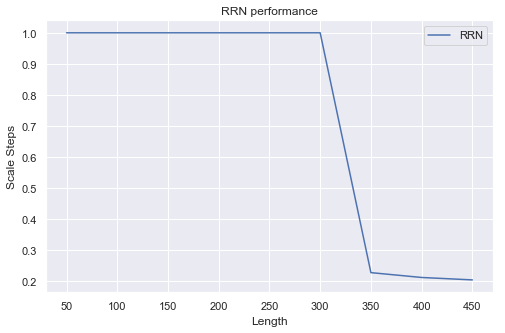

In [30]:
title = "RRN performance"
ylabel = "Scale Steps"
xlabel = "Length"

sns.set(rc={'figure.figsize':(8,5)})

ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["rrn acc"], 
                  label = "RRN")

ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")

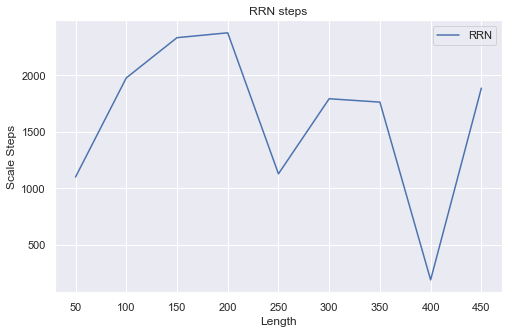

In [31]:
title = "RRN steps"
ylabel = "Scale Steps"
xlabel = "Length"

sns.set(rc={'figure.figsize':(8,5)})

ax = sns.lineplot(x = df_stats["input_length"], 
                  y = df_stats["rrn steps"], 
                  label = "RRN")

ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")